In [1]:
from pylsl import StreamInlet, resolve_stream


def main():
    # first resolve an EEG stream on the lab network
    print("looking for an EEG stream...")
    streams = resolve_stream('type', 'EEG')

    # create a new inlet to read from the stream
    inlet = StreamInlet(streams[0])

    while True:
        # get a new sample (you can also omit the timestamp part if you're not
        # interested in it)
        sample, timestamp = inlet.pull_sample()

        print(sample, timestamp)


if __name__ == '__main__':
    main()


looking for an EEG stream...
[4168.46142578125, 4226.02587890625, 4075.0, 4153.7177734375, 4233.84619140625, 4248.97412109375, 4274.1025390625, 4491.9228515625, 4454.1025390625, 4458.58984375, 4285.76904296875, 5362.43603515625, 4177.6923828125, 4085.25634765625] 168374.8491685
[4172.43603515625, 4222.8203125, 4072.94873046875, 4154.87158203125, 4235.76904296875, 4250.384765625, 4271.15380859375, 4492.94873046875, 4453.205078125, 4459.4873046875, 4286.66650390625, 5362.1796875, 4177.3076171875, 4086.53857421875] 168374.8541212
[4173.0771484375, 4222.43603515625, 4075.0, 4155.25634765625, 4234.23095703125, 4250.25634765625, 4272.56396484375, 4493.7177734375, 4453.58984375, 4461.794921875, 4288.0771484375, 5362.8203125, 4176.9228515625, 4090.512939453125] 168374.863123
[5776.794921875, 4363.97412109375, 322.5640869140625, 1346.6666259765625, 7905.64111328125, 393.974365234375, 7745.5126953125, 5382.6923828125, -8.959999831859022e-06, -8.959999831859022e-06, -8.959999831859022e-06, -8.959

KeyboardInterrupt: 

In [46]:

streams = resolve_stream('type', 'EEG')

    # create a new inlet to read from the stream

inlet = StreamInlet(streams[0])
print(inlet.info().source_id())
sample, timestamp = inlet.pull_sample()
print(sample, timestamp)


[4169.4873046875, 4217.94873046875, 4087.564208984375, 4168.33349609375, 4233.46142578125, 4249.1025390625, 4268.0771484375, 4498.46142578125, 4448.7177734375, 4456.02587890625, 4288.33349609375, 5362.05126953125, 4172.56396484375, 4092.94873046875] 171517.8402272


In [63]:
buffer = []
sample, timestamp = inlet.pull_sample()
first_timestamp = timestamp
while True:
    sample, timestamp = inlet.pull_sample()
    buffer.append(sample)
    if timestamp - first_timestamp > 1:
        print(len(buffer))
        break

# while True:
#     if len(buffer) < 2:
#         sample, timestamp = inlet.pull_sample()

#         buffer.append(sample)
#     else:
#         print(buffer)
#         buffer = []
#         break


162


[ 9.11252432e-01 -1.64745806e+00  3.49371338e-06  1.10006770e+03
  3.90574687e-03  3.88562667e-03  1.27228941e-07  1.57448189e+00
  1.10044222e+00  4.10666650e-03  2.94846143e-03  4.09794873e-03
  2.79144063e-04  2.16411595e-32  3.92384975e-03  6.71587147e-09
  1.55238258e-05  3.94002866e-03  9.97373176e-06  3.56831075e-04
  1.00000000e+00  1.40962751e-01             nan  4.09810424e-03
  1.57901514e-07]


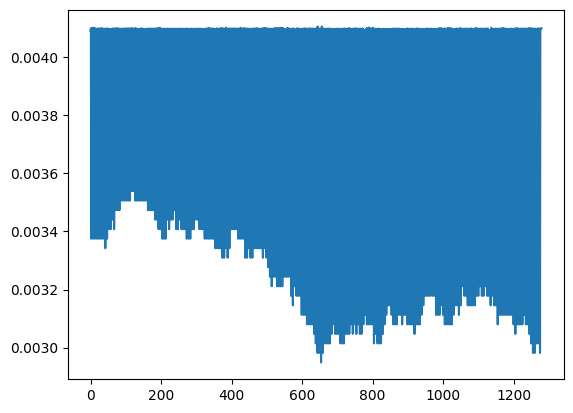

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, iqr, gmean, hmean
from scipy.linalg import svd

import scipy.io
mat = scipy.io.loadmat('eeg_data.mat')

plt.plot(mat["eeg_data"][:,2])

def createFeatures(data):
    features = []
    # Basıklık
    features.append(kurtosis(data))
    # Çarpıklık
    features.append(skew(data))
    # *IQR
    features.append(iqr(data))
    # DK
    features.append(100*np.mean(data)/np.std(data))
    # Geometrik Ortalama
    features.append(gmean(data))
    # Harmonik Ortalama
    features.append(hmean(data))
    # Hjort Parametreleri Aktivite - Hareketlilik - Karmaşıklık
        # Activity is the variance of the signal
    activity = np.var(data)
    # Mobility is the square root of the variance of the first derivative
    # divided by the activity
    first_derivative = np.diff(data)
    mobility = np.sqrt(np.var(first_derivative) / activity)
    
    # Complexity is the mobility of the first derivative divided by the mobility
    # of the original signal
    second_derivative = np.diff(first_derivative)
    complexity = np.sqrt(np.var(second_derivative) / np.var(first_derivative)) / mobility
    features.append(activity)
    features.append(mobility)
    features.append(complexity)
    # Maxiumum
    features.append(np.max(data))
    # Minimum
    features.append(np.min(data))
    # Medyan
    features.append(np.median(data))
    # Ortalama Mutlak Sapma
    features.append(np.mean(np.absolute(data - np.mean(data))))
    # Merkezi Moment
    features.append(np.mean((data - np.mean(data))**10))
    # Ortalama
    features.append(np.mean(data))
    # Ortalama Eğri Uzunluğu
    features.append(np.mean(np.diff(data)))
    # Ortalama Enerji
    features.append(np.mean(data**2))
    # Ortalama Karekök
    rms = np.sqrt(np.mean(np.square(data)))
    features.append(rms)
    # Standart Hata
    features.append(np.std(data, ddof=1) / np.sqrt(len(data)))
    # Standart Sapma
    features.append(np.std(data, ddof=1))
    # Şekil Faktörü
    mean_power = np.mean(np.square(data))
    features.append((rms ** 2) / mean_power)
    # Tekil Değer Ayrışımı
    data_array = np.array(data).reshape(-1, 1)
    # Tekil değer ayrışımını uygula
    U, s, Vt = svd(data_array, full_matrices=False)
    features.append(s[0])
    # %25 Kırpılmış Ortalama
    features.append(np.mean(data[np.abs(data - np.mean(data)) < (0.25 * np.std(data))]))
    # %50 Kırpılmış Ortalama
    features.append(np.mean(data[np.abs(data - np.mean(data)) < (0.50 * np.std(data))]))
    # Ortalama Teager Enerjisi
    teager_energy = [data[i]**2 - data[i-1] * data[i+1] for i in range(1, len(data) - 1)]
    
    # Ortalama Teager enerjisini hesapla
    features.append(np.mean(teager_energy))
    return np.array(features)

data = mat["eeg_data"][:,2]
#datanın transpozunu alıyoruz
data = data.T

#veriyi 4 parçaya bölüyoruz


features = createFeatures(data)
print(features)


1280 [0.00409192 0.00409923 0.00337513 ... 0.00409769 0.00410026 0.00410051]


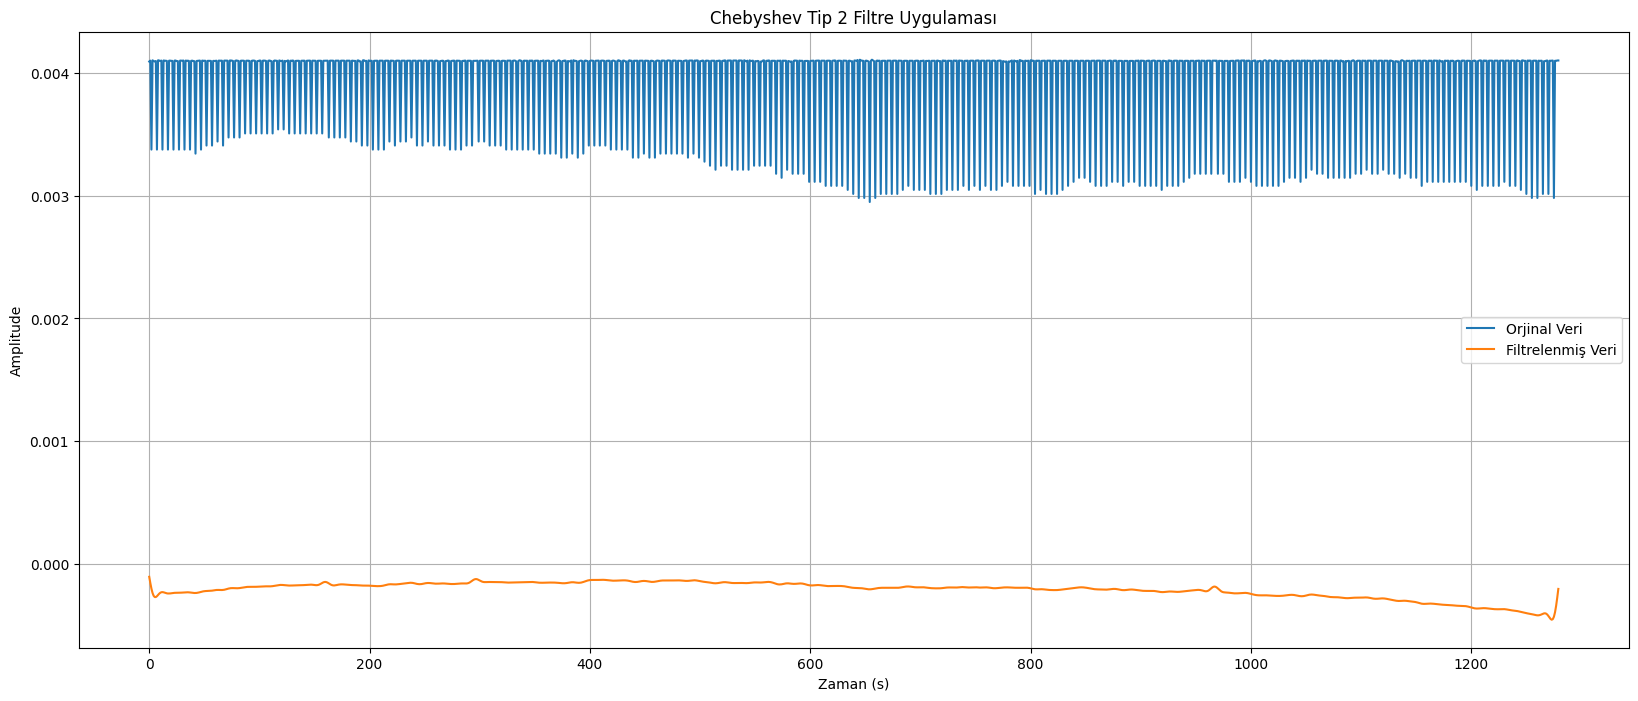

In [140]:
import numpy as np
from scipy.signal import cheby2, filtfilt
import matplotlib.pyplot as plt

# Örnek veri oluşturulması
fs = 128  # Örnekleme frekansı (örneğin 128 Hz)
#t = np.arange(0, 10, 1/fs)  # Zaman aralığı: 0'dan 10 saniyeye kadar
#data_length = len(t)
# Random veri oluşturulması
#data = np.random.normal(loc=0, scale=1, size=data_length)
import scipy.io
mat = scipy.io.loadmat('eeg_data.mat')
data = mat["eeg_data"][:,2]
data_length = len(data)
print(data_length,data)
# Filtre parametreleri
N = 4  # Filtre derecesi
Wn = [0.01, 20]  # Kesme frekansı aralığı (0.1 Hz - 100 Hz)
b, a = cheby2(N, rs=40, Wn=Wn, btype='bandpass', fs=fs)

# Filtreleme
filtered_data = filtfilt(b, a, data)

# Orjinal ve filtrelenmiş veriyi çizme
plt.figure(figsize=(20, 8))
plt.plot(data, label='Orjinal Veri')
plt.plot(filtered_data, label='Filtrelenmiş Veri')
plt.title('Chebyshev Tip 2 Filtre Uygulaması')
plt.xlabel('Zaman (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()